# Classification Problem : Breast Cancer Prediction

#### About Tumors

Tumors are abnormal growths in your body. They are made up of extra cells. Normally, cells grow and divide to form new cells as your body needs them. When cells grow old, they die, and new cells take their place. Sometimes, this process goes wrong. New cells form when your body does not need them, and old cells do not die when they should. When these extra cells form a mass, it is called a tumor.

Tumors can be either benign or malignant. Benign tumors aren't cancer. Malignant ones are. Benign tumors grow only in one place. They cannot spread or invade other parts of your body. Even so, they can be dangerous if they press on vital organs, such as your brain.

## Dataset

#### General Information
- Data format: .csv
- Data shape : 569 x 33 (row x columns)

#### Features Information

For each sample, 10 properties were measured:


<ol>
    <li><b>Radius</b> - Mean distances from center to points on the perimeter</li>
    <li><b>Texture</b> - Standard deviation of gray scale values</li>
    <li><b>Perimeter</b></li>
    <li><b>Area</b></li>
    <li><b>Smoothness</b> - Local variation in radius lengths</li>
    <li><b>Compactness</b> - Perimeter^2/Area - 1</li>
    <li><b>Concavity</b> - Severity of concave portions of the contour</li>
    <li><b>Concave points</b> - Number of concave portions of the contour</li>
    <li><b>Symmetry</b></li>
    <li><b>Fractal Dimension</b> - Coastline approximation - 1 </li>
</ol>

For each property, 3 calcualted values have been provided in the dataset.
- **Mean**
- **Standard Error**
- **Worst** (Average of the 3 largest values)

#### Target

Target column is categorical column with values as 'B' (Benign) and 'M' (Malignant) <br>




## Problem Solving Approach

This dataset contains information on 569 breast tumors and the mean, standard error and worst measures for 10 different properties. I start with an EDA analysing each properties' distribution, followed by the pair interactions and then the correlations with our target.

After the EDA I set up 8 different models for a first evaluation and use stratified cross-validation to measure them. I use **Recall** instead of **Accuracy or F1-Score** since I want to detect all malignant tumors. 

After the first round of modeling, I have analyzed features importances and have done single round of feature selection and evaluated the models again. At the end, I analyzed model errors from the 8 first models and I have chose 2 models for fine tuning: 
**Logistic Regression, SVC**

Then I proceed to tune the top 2 models using **GridSearchCV** and prepare the data for model by predicting probabilities for both train and test sets.



## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#display all columns of dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('data.csv')

data.shape

(569, 33)

In [3]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [4]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%    

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id column is unique for every sample. This column can be dropped for analysis.
unnamed:32 column has all values as null. This column is also dropped for analysis

We do not have any missing values in all features columns and all columns are float type except target/label column

In [6]:
data=data.drop(['id','Unnamed: 32'],axis=1)
data.shape

(569, 31)

In [7]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [8]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Since the target column 'diagnosis' is not in numerical form. Label encoding is done to make it numerical column. since the target column only has 2 columns, one-hot encoding after the label encoding is not necessary.

Assigning 'B' as 0 and 'M' as 1 in the diagnosis column

In [9]:
#label encoding for diagnosis column

data['diagnosis']=data['diagnosis'].map({'B':0,'M':1})

In [10]:
data['diagnosis'].value_counts()/len(data)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

Target column does not seem to be balanced. only 37% of the data is malignant.


Before performing EDA, data is split train, test split because model is built on train data and assume test data is not available to check the model performance. 

In [11]:
# Train-Test Split
from sklearn.model_selection import train_test_split

In [12]:
train_data,test_data=train_test_split(data,stratify=data['diagnosis'],test_size=0.3,random_state=123)

In [13]:
train_data.shape,test_data.shape

((398, 31), (171, 31))

In [14]:
train_data['diagnosis'].value_counts()/len(train_data),test_data['diagnosis'].value_counts()/len(test_data)

(0    0.628141
 1    0.371859
 Name: diagnosis, dtype: float64,
 0    0.625731
 1    0.374269
 Name: diagnosis, dtype: float64)

data is now split into proper proportions of target column for good model building

## Exploratory Data Analysis

Since the features are calcualted with mean, standard error and worst values. 3 lists are now created to for each set of these features

In [15]:
mean_features= train_data.iloc[:,1:11].columns.to_list()
se_features= train_data.iloc[:,11:21].columns.to_list()
worse_features= train_data.iloc[:,21:31].columns.to_list()
target='diagnosis'

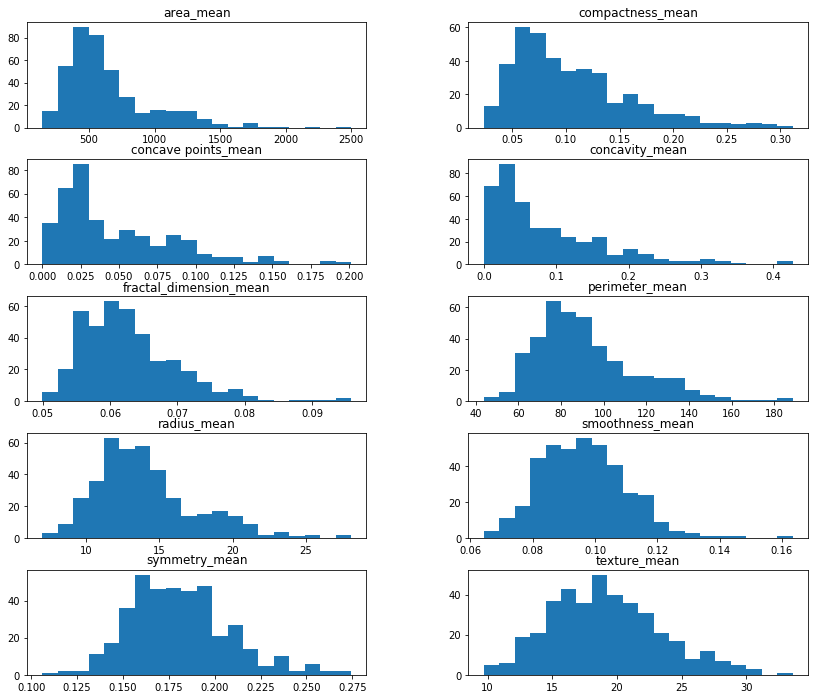

In [16]:
#check distrubtion of data using histograms
train_data[mean_features].hist(figsize=(14,12),layout=(5,2),bins=20,grid=False)
plt.show()

Distributions are skewed for most of the mean features

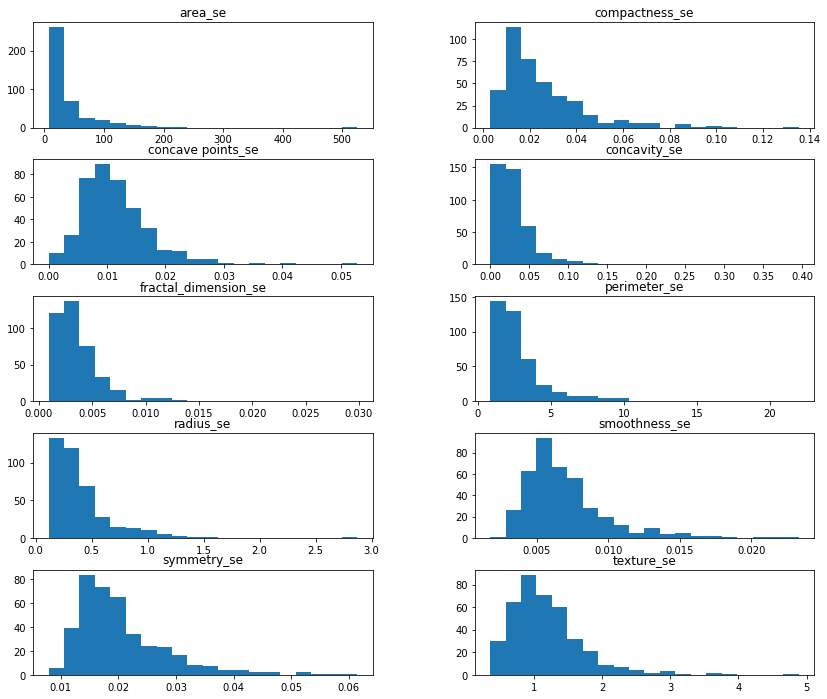

In [17]:
train_data[se_features].hist(figsize=(14,12),layout=(5,2),bins=20,grid=False)
plt.show()

Distributions are skewed for se features as well

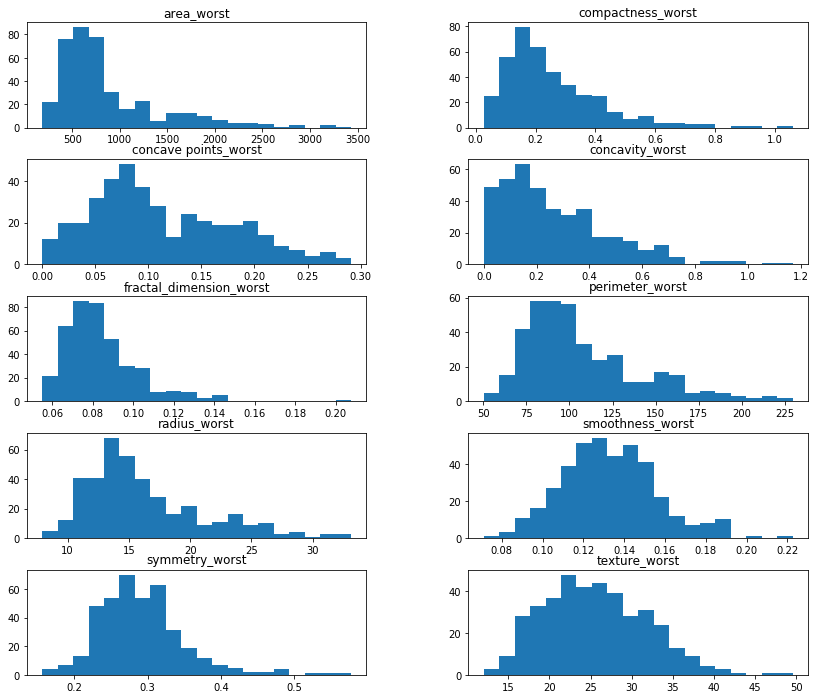

In [18]:
train_data[worse_features].hist(figsize=(14,12),layout=(5,2),bins=20,grid=False)
plt.show()

Distributions for worse features are also skewed


### Correlation check

- Using Seaborn Pairplot and correaltion heatmap to identify patterns among features

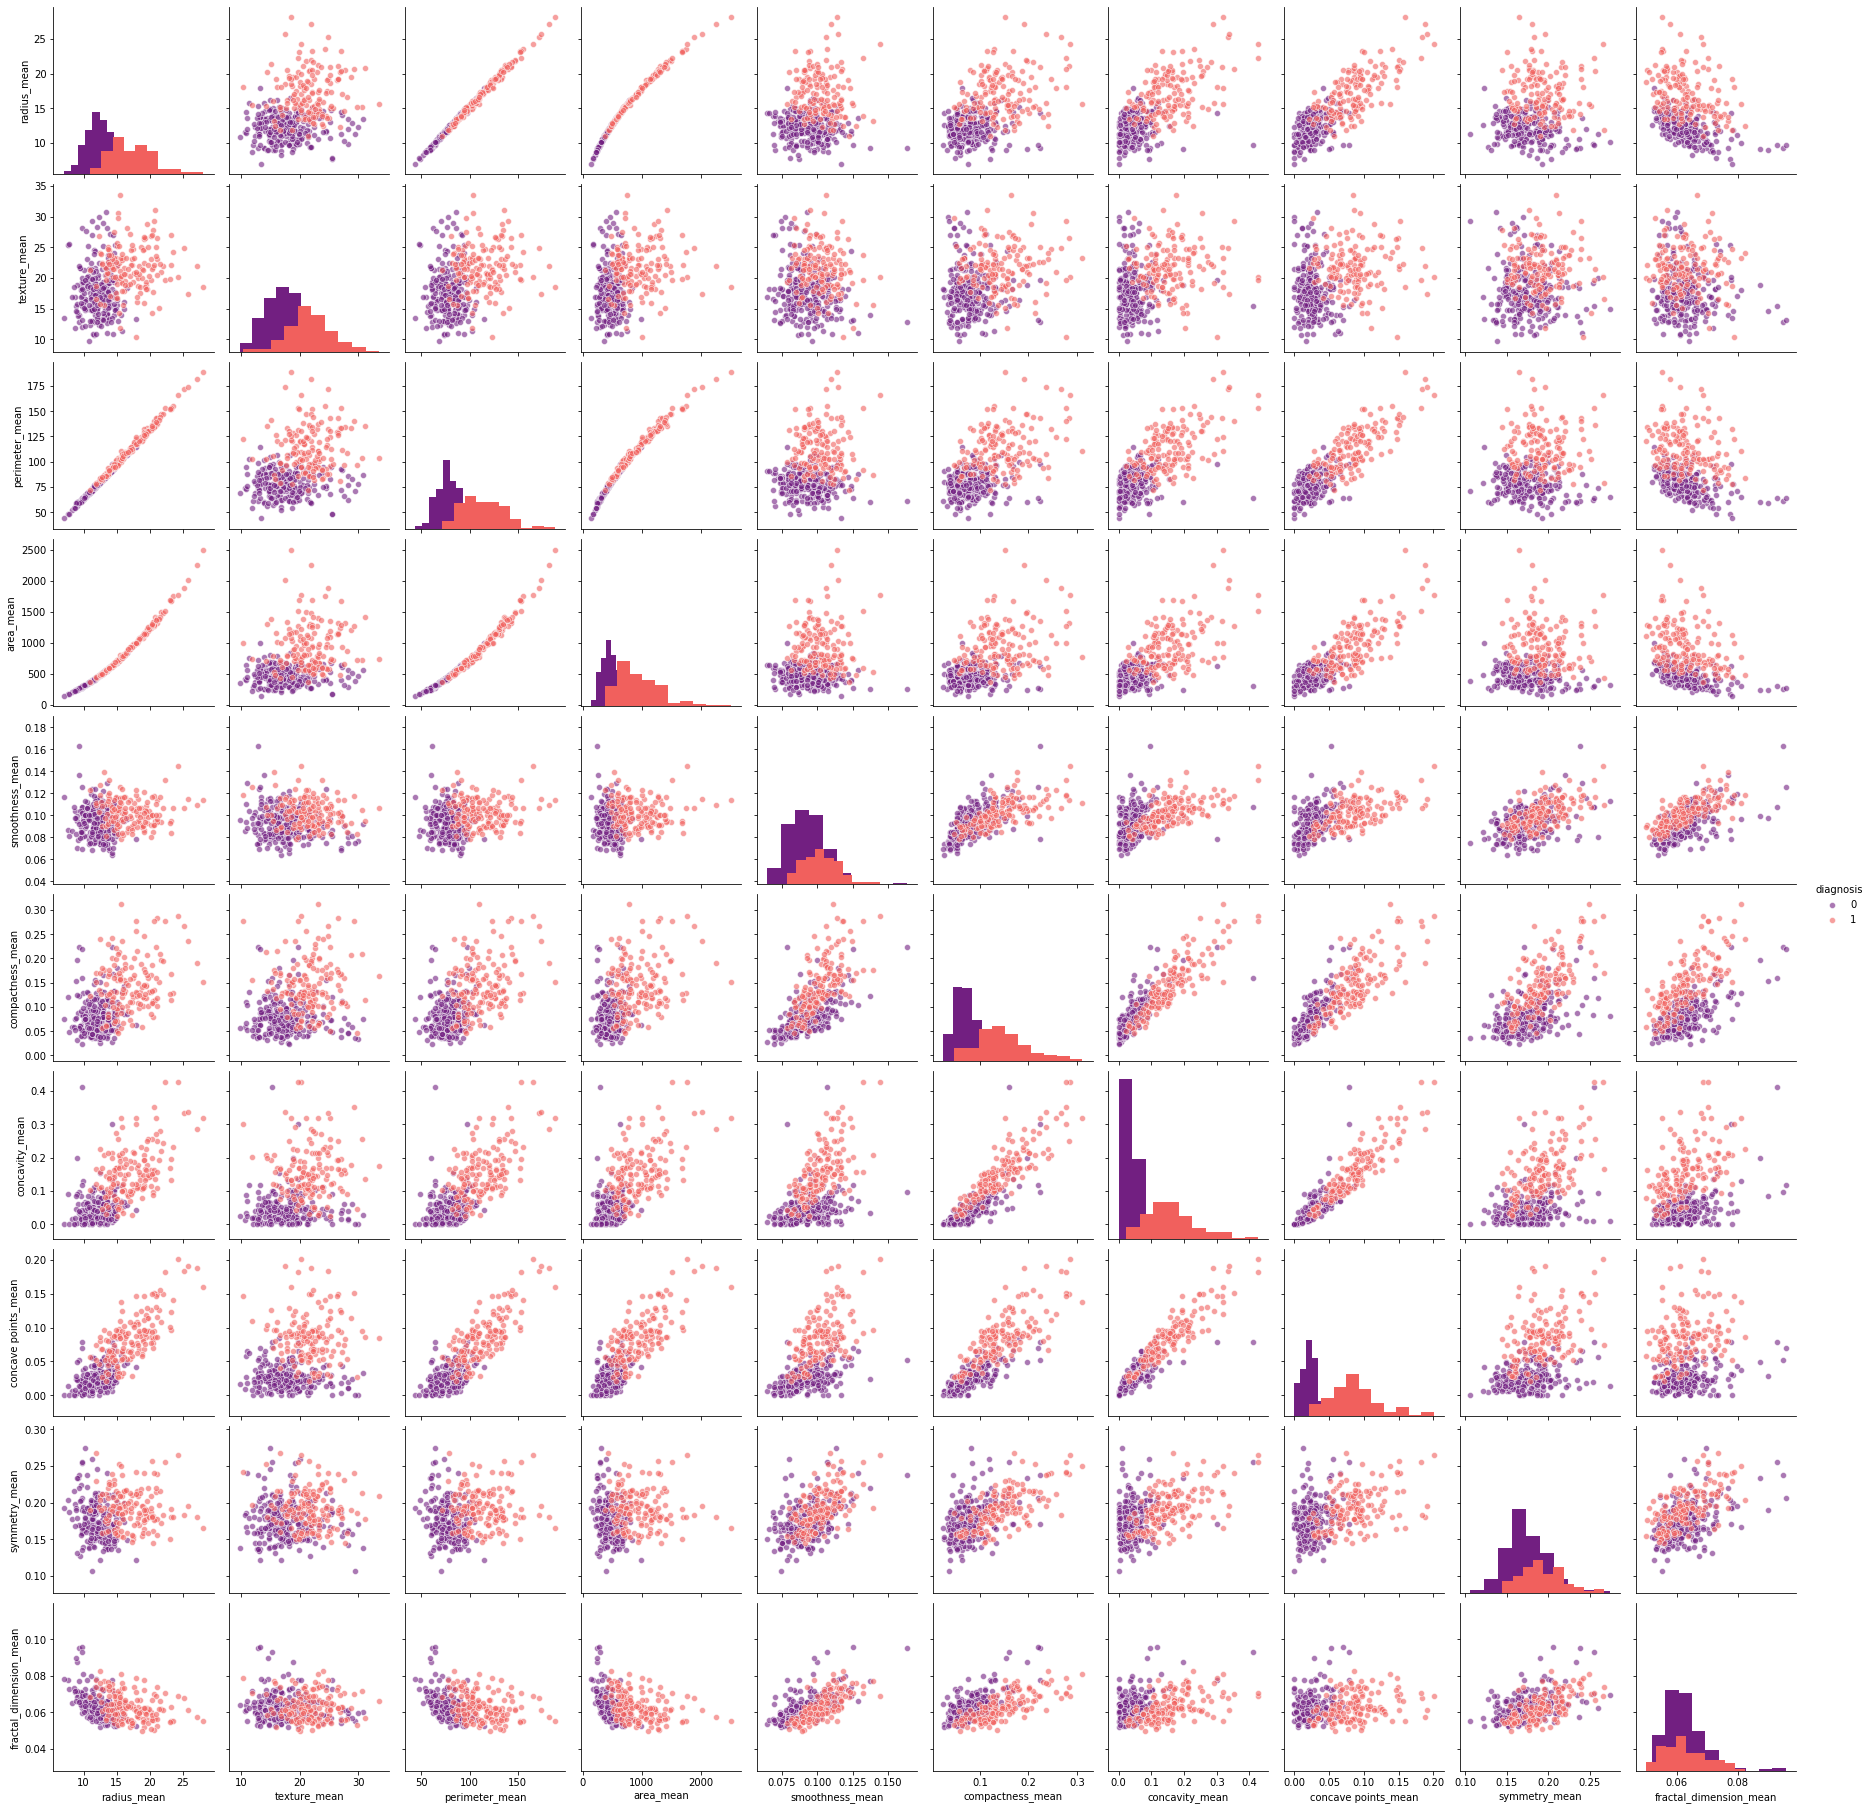

In [19]:
sns.pairplot(train_data[mean_features+['diagnosis']],hue='diagnosis',diag_kind='hist',plot_kws={'alpha':0.6}, palette='magma')

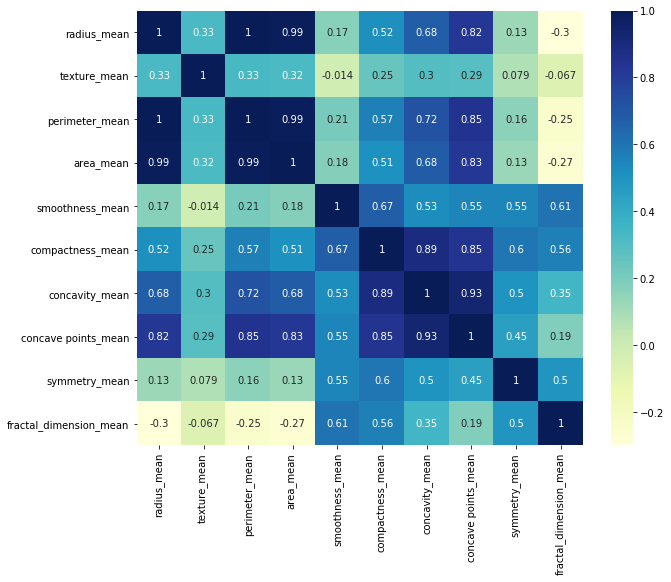

In [20]:
# let us check heatmap
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(train_data[mean_features].corr(),cmap='YlGnBu',annot=True,ax=ax)

Mean features exhibit good correaltion pattern among them.

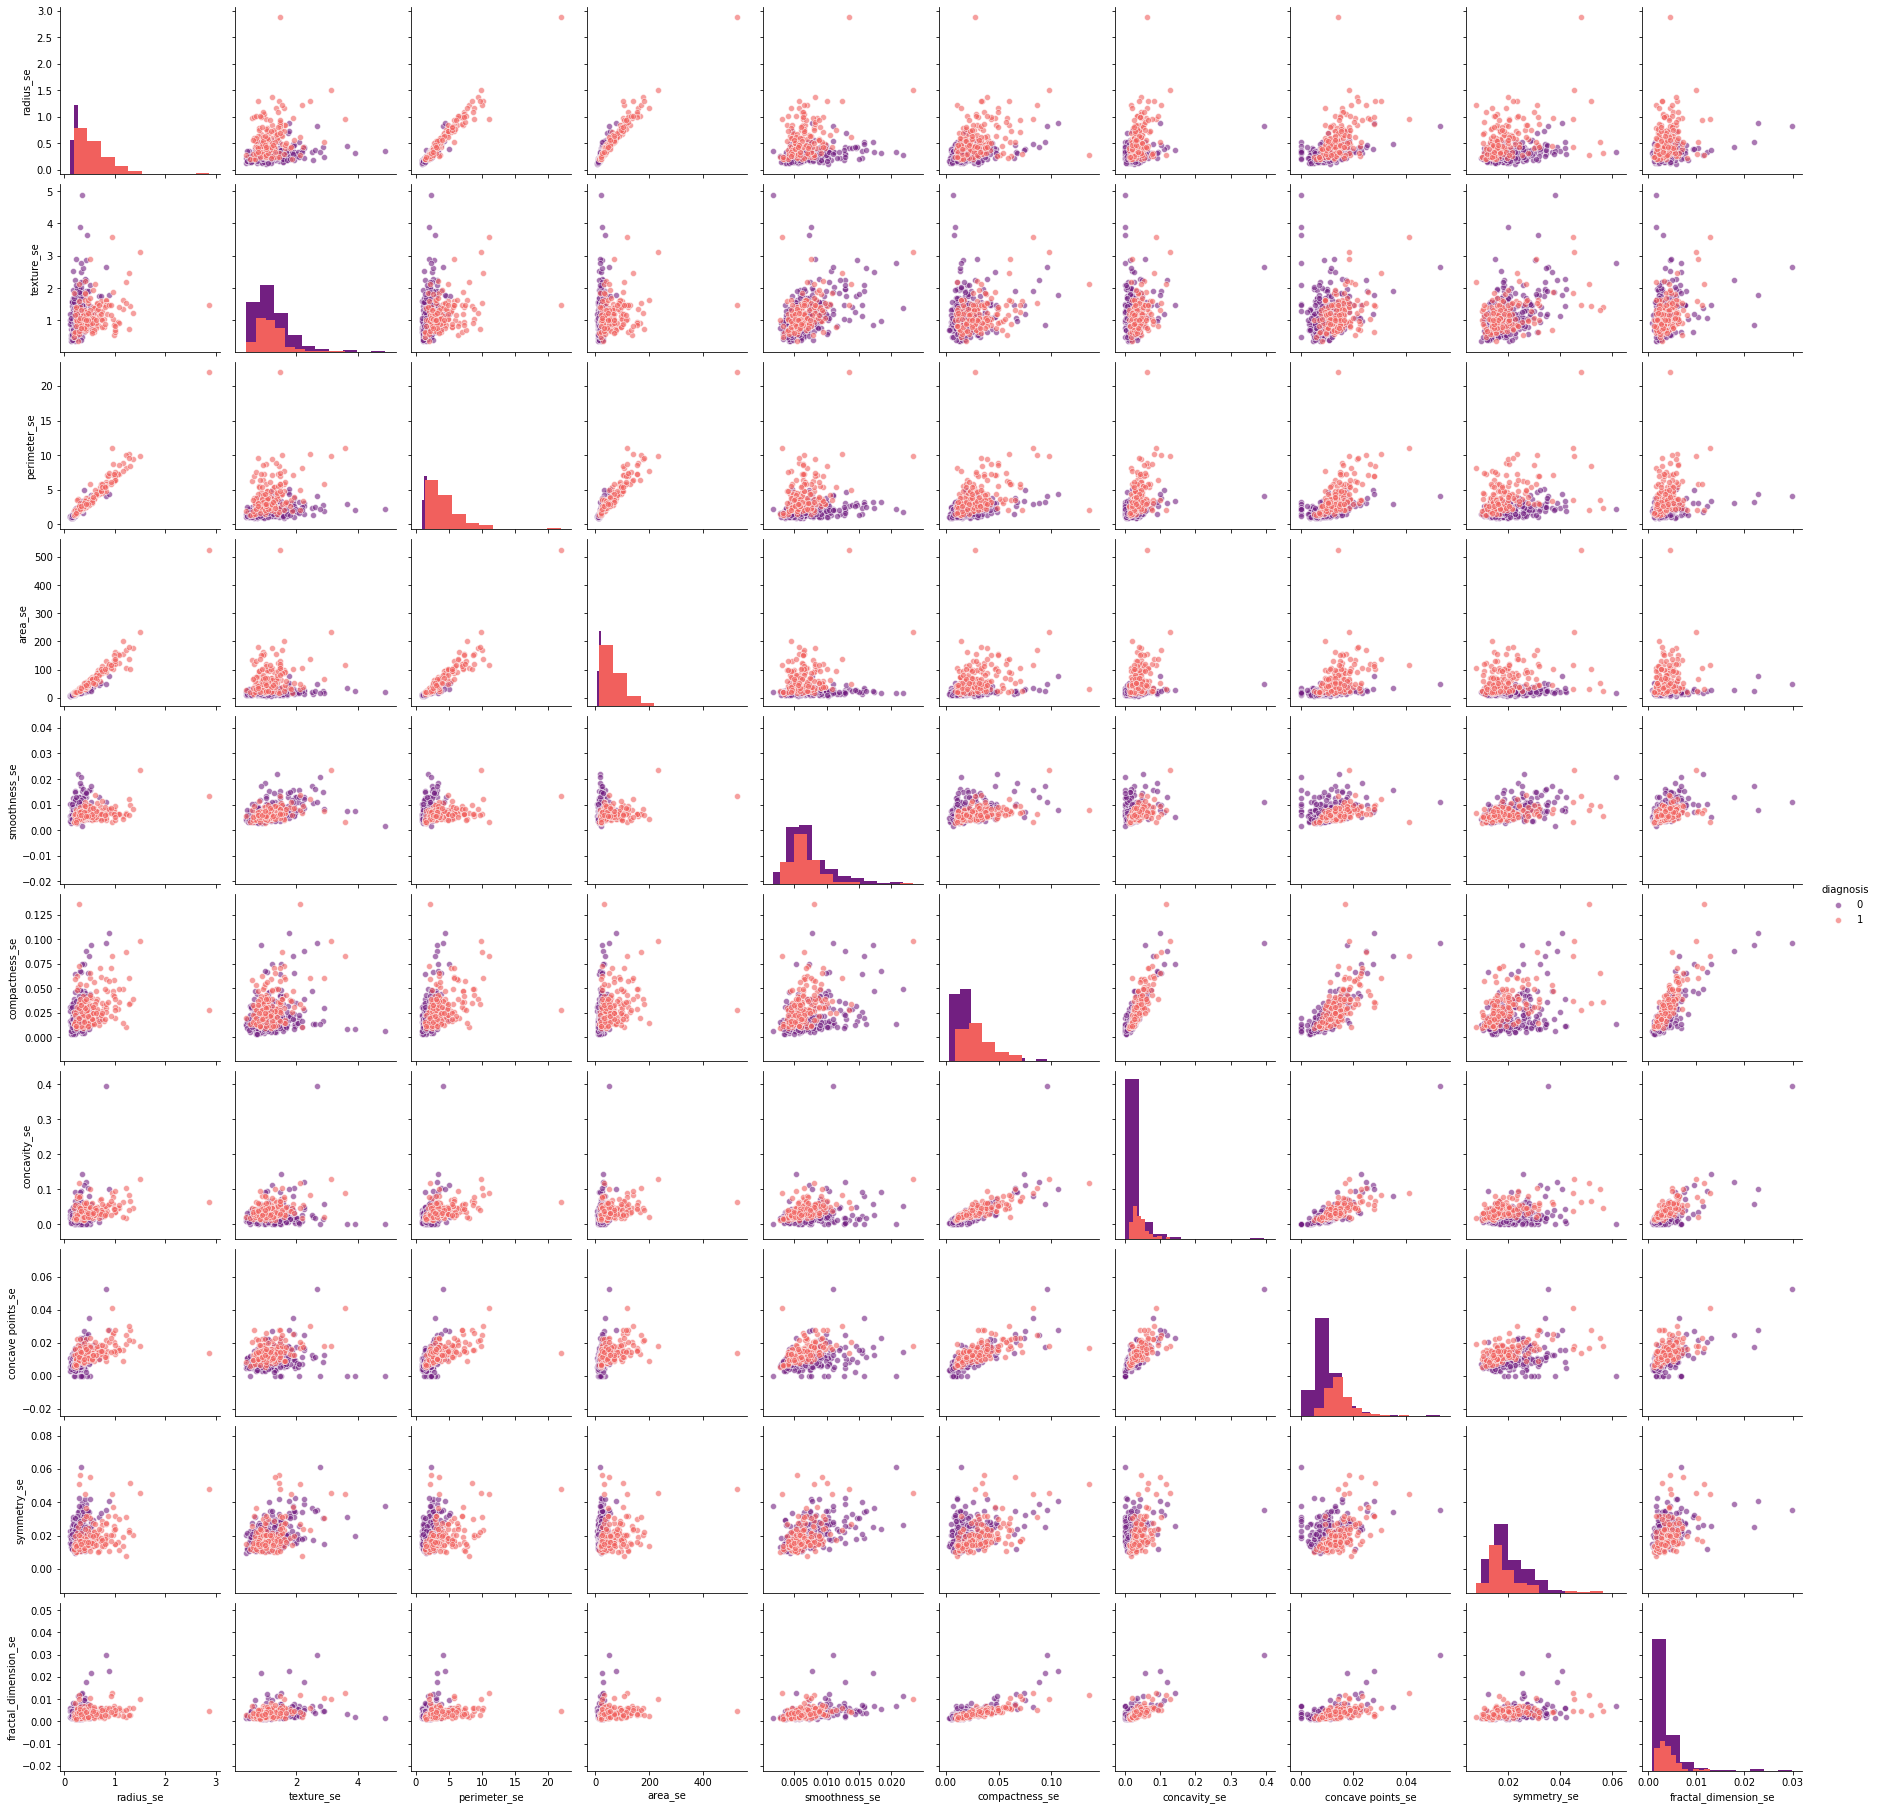

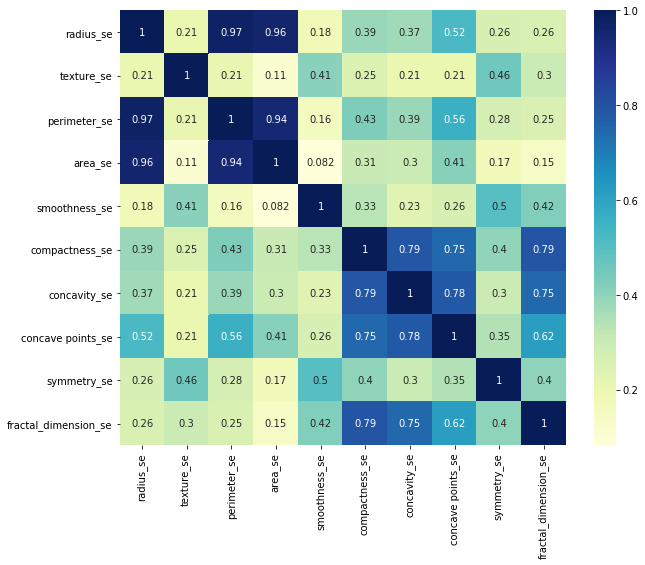

In [21]:
sns.pairplot(train_data[se_features+['diagnosis']],hue='diagnosis',diag_kind='hist',plot_kws={'alpha':0.6}, palette='magma')
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(train_data[se_features].corr(),cmap='YlGnBu',annot=True,ax=ax)

Standard error features do not exhibit good correaltion pattern among them. So there is no collinearity among them which is good.

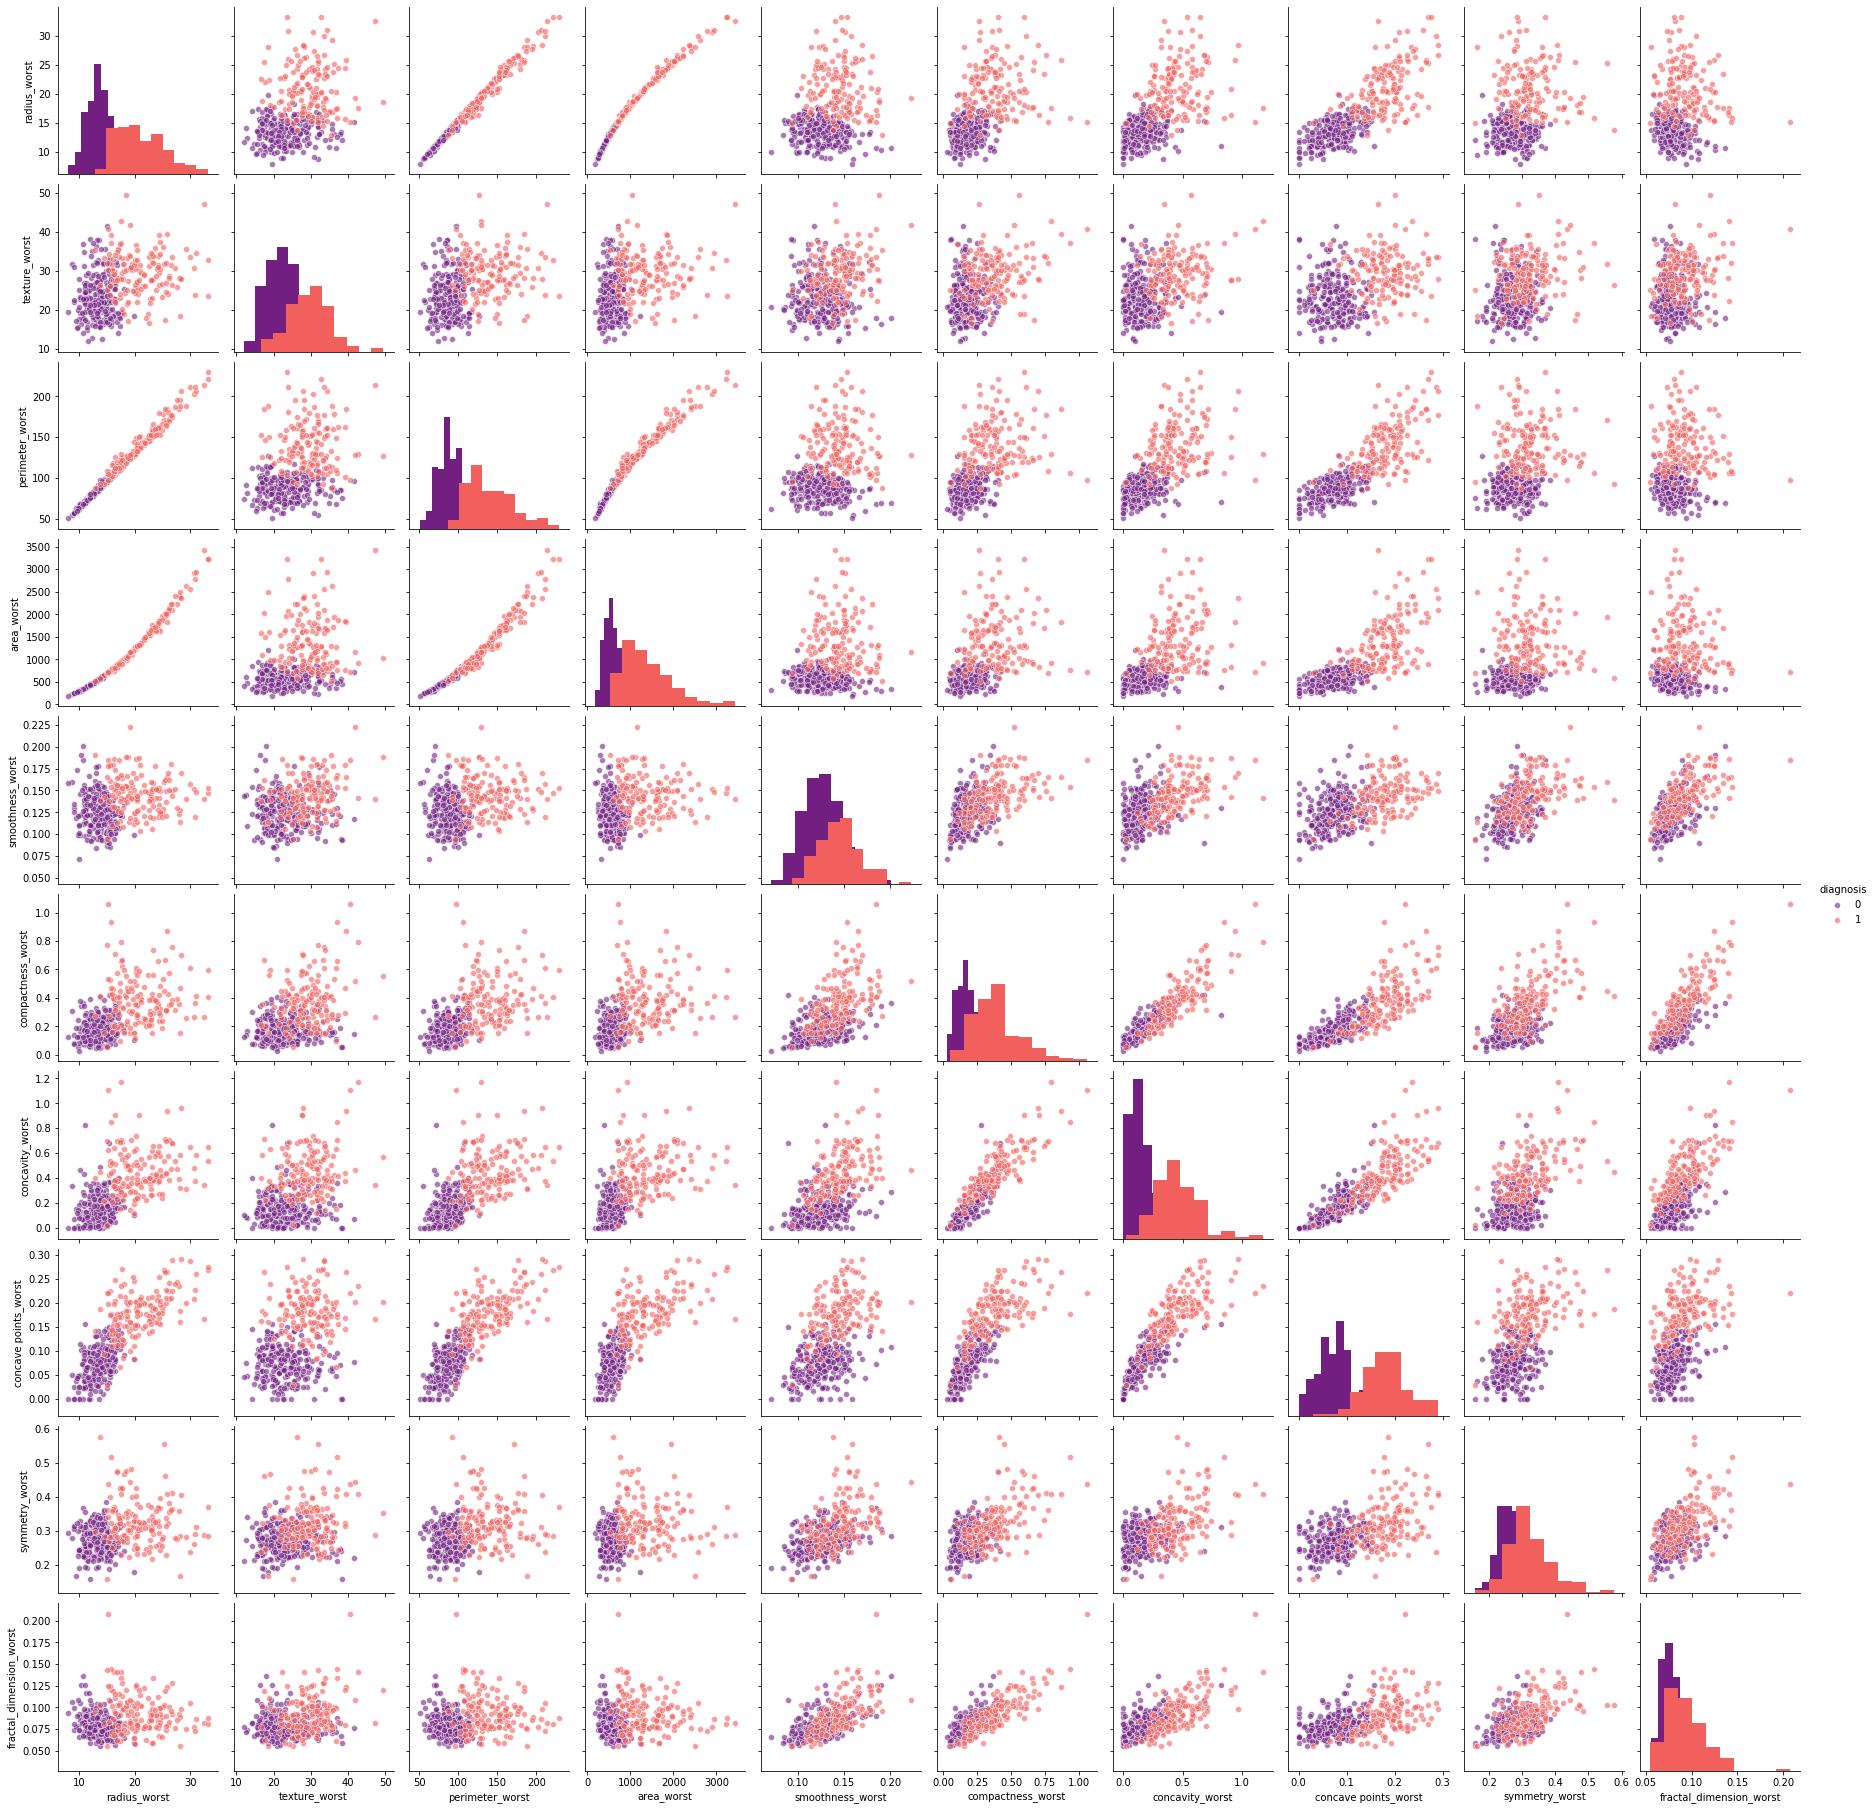

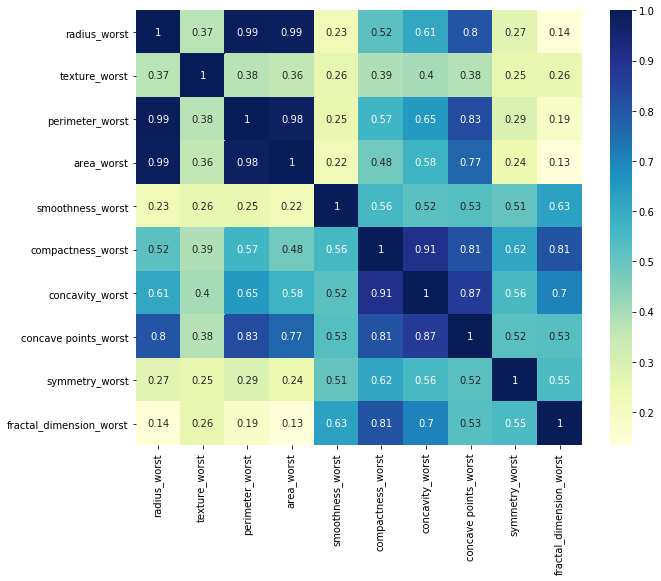

In [22]:
sns.pairplot(train_data[worse_features+['diagnosis']],hue='diagnosis',diag_kind='hist',plot_kws={'alpha':0.6}, palette='magma')
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(train_data[worse_features].corr(),cmap='YlGnBu',annot=True,ax=ax)

Worse features exhibit good correaltion pattern among them like mean features.

### Correlation with target

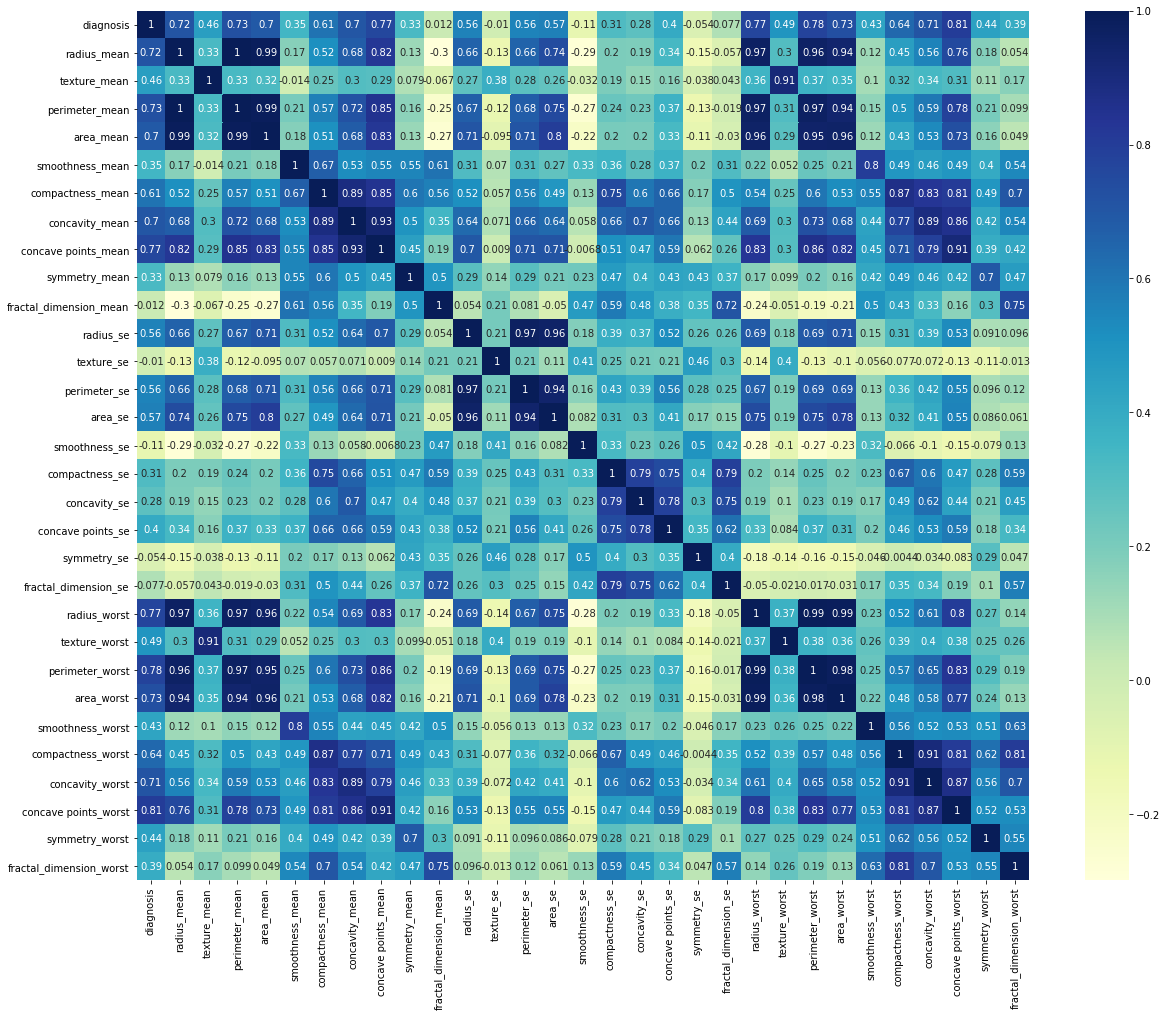

In [23]:
fig,ax=plt.subplots(figsize=(20,16))
sns.heatmap(train_data.corr(),cmap='YlGnBu',annot=True,ax=ax)

In [24]:
train_data.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.805743
perimeter_worst            0.781024
radius_worst               0.769731
concave points_mean        0.765903
area_worst                 0.733962
perimeter_mean             0.730885
radius_mean                0.715728
concavity_worst            0.711999
concavity_mean             0.701971
area_mean                  0.695174
compactness_worst          0.642147
compactness_mean           0.607747
area_se                    0.565331
radius_se                  0.560965
perimeter_se               0.557789
texture_worst              0.493848
texture_mean               0.455633
symmetry_worst             0.444281
smoothness_worst           0.427309
concave points_se          0.401322
fractal_dimension_worst    0.391125
smoothness_mean            0.348133
symmetry_mean              0.326594
compactness_se             0.311711
concavity_se               0.276877
fractal_dimension_se       0.076704
fractal_dimension_mean     0

#### Insights from plots

The two highest correlated feature types are WORST and MEAN and the lowest is the STANDARD ERROR.
But now we can't see how the combination of features influence in our target. I am not removing them and let my model decide.

## Model Building

Idea is try different models and evaluate them in our training data. My idea here is to try linear, tree based adn ensemble models. Most of the selected models provide feature importance information.
See if the first results give us any tips on how to improve our data somehow and test some ideas (feature engineering)
Choose the top five most promising and distinct models
The models we will be using are:

- Logistic Regression
- Support Vector Classifier (SVC)
- Decision Tree
- Random Forests
- Gradient Boos Classifier
- AdaBoost Classifier
- XGB
- K-Nearest Neighbors

In [25]:
#Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier

#Importing metrics and others
from sklearn.metrics import confusion_matrix,classification_report,make_scorer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [26]:
#Defining random seed
seed=123

#Creating models
log = LogisticRegression(random_state=seed)
svc= SVC(random_state=seed,probability=True)
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier(random_state=seed)
rf=RandomForestClassifier(random_state=seed)
gb=GradientBoostingClassifier(random_state=seed)
agb=AdaBoostClassifier(random_state=seed)
#xgb=XGBClassifier()

models =[log,svc,knn,dt,rf,gb,agb]
model_names=['Logistic Regression','SVC','kNN','Decision Tree','Random Forest','Gradient Boost','Ada Boost']

#Cross_validation
n_folds=5
skf=StratifiedKFold(n_splits=n_folds,random_state=seed)
scaler=StandardScaler()

C:\Users\A272609\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [27]:
X_train=train_data.drop('diagnosis',axis=1)
y_train=train_data['diagnosis']

## Model Evaluation

### Choosing the Proper Measure to Evaluate the Model Performance
There are **a lot** of ways to measure the quality of your model and so measure of performance must be chosen correctly.

Here our objective isn't classifying correctly the tumors but to accurately detect malignant tumors. Even though, we are trying to classify, cost of classifying a malignant tumor as benign is more. so,we would go with **RECALL** not **ACCURACY** because accuracy is all out pecent of predicting classes into right categories only.

Recall answers the following question: *from all the malignant tumors in our data, how many did we catch?*. Recall is calculated by dividing the True positives by the total number of positives (positive = malignant). It is important to realize that a high Recall doesn't mean a high Accuracy and there is often a trade-off between different performance measures. 

That said, we will be making our decisions based on Recall but we will also measure Accuracy to see the difference between them. 

### Coding Explanation:

The code on the cell below does the following steps:
* Setting up:
    1. Creates an array to store the out-of-fold predictions that we will use later on. Its shape is the training size by the number of models we have;
    2. Creates a list to store the Accuracy and Recall scores
* Outer Loop: Iterating through Models
    1. Creates a data pipeline with the scaler and the model
    - Creates two arrays to store each fold's accuracy and recall
    - Executes the inner loop
    - By the end of the cross-validation, stores the mean and the standard deviation for those two measures in the scores list
* Inner Loop: Cross-Validation
    1. Splits the training data into train/validation data
    2. Fits the model with the CV training data and predicts the validation data
    3. Stores the out-of-fold predictions (which is the validation predictions) in oof_preds
    4. Measures the Accuracy and Recall for the fold and stores in an array

In [28]:
def initial_model(X_train,y_train):
    train_size=X_train.shape[0]
    n_models=len(models)
    pred=np.zeros((train_size,n_models))
    scores=[]
    
    for n,model in enumerate(models):
        model_pipeline=Pipeline(steps=[('scaler',scaler),('estimator',model)])
        accuracy=np.zeros(n_folds)
        recall=np.zeros(n_folds)
        
        for i, (train_ix,val_ix) in enumerate(skf.split(X_train,y_train)):
            x_tr,y_tr=X_train.iloc[train_ix],y_train.iloc[train_ix]
            x_val,y_val=X_train.iloc[val_ix],y_train.iloc[val_ix]
            
            model_pipeline.fit(x_tr,y_tr)
            val_pred=model_pipeline.predict(x_val)
            
            pred[val_ix,n] = model_pipeline.predict_proba(x_val)[:,1]
            
            fold_accuracy= accuracy_score(y_val,val_pred)
            fold_recall = recall_score(y_val,val_pred)
            
            accuracy[i]=fold_accuracy
            recall[i]=fold_recall
            
        scores.append({'Accuracy': accuracy.mean(), 'Recall': recall.mean()})
    return scores,pred
            

### Initial Model Evaluation

In [29]:
scores,pred=initial_model(X_train,y_train)

In [30]:
measure_cols=['Accuracy','Recall']

first_score= pd.DataFrame(columns=measure_cols)

for name, score in zip(model_names,scores):
    
    new_row=pd.Series(data=score,name=name)
    first_score=first_score.append(new_row)
    
first_score=first_score.sort_values('Recall',ascending=False)
first_score

Accuracy    Recall
Logistic Regression  0.984968  0.966437
SVC                  0.977468  0.953103
Ada Boost            0.959810  0.939770
Gradient Boost       0.959778  0.939310
Random Forest        0.954778  0.932874
kNN                  0.964842  0.926207
Decision Tree        0.932057  0.926207

This table shows us each model ordered by its Recall, descending.

- Logistic Regression and SVC got the highest scores, while KNN and Random Forest the lowest.
- Most of the got above 95% accuracy and 93% recall on a first try.

## Feature Selection

Most models provide a method that returns feature importances or coefficients so we can have an idea of what is being considered the most important features of our dataset. SVC and KNN are the ones that don't have it.

Let's see if we can find anything from the other models preferences.

In [31]:
def feat_imp():
    feature_names = X_train.columns
    feat_imp_df = pd.DataFrame(columns=model_names, index=feature_names)

    # Dropping the Models that don't have feature importances for this analysis
    feat_imp_df.drop(['SVC', 'kNN'], axis=1, inplace=True)

    feat_imp_df['Logistic Regression'] = np.abs(log.coef_.ravel())
    feat_imp_df['Decision Tree'] = dt.feature_importances_
    feat_imp_df['Random Forest'] = rf.feature_importances_
    feat_imp_df['Gradient Boost'] = gb.feature_importances_
    feat_imp_df['Ada Boost'] = agb.feature_importances_
    #feat_imp_df['XGB'] = xgb.feature_importances_
    
    return feat_imp_df

In [32]:
feat_imp_df = feat_imp()
feat_imp_df.head()

Logistic Regression  Decision Tree  Random Forest  \
radius_mean                 0.587554       0.008936       0.036135   
texture_mean                0.724613       0.046999       0.015407   
perimeter_mean              0.562957       0.000000       0.052315   
area_mean                   0.586506       0.013003       0.034224   
smoothness_mean             0.038324       0.000000       0.005015   

                 Gradient Boost  Ada Boost  
radius_mean            0.002851       0.00  
texture_mean           0.050453       0.12  
perimeter_mean         0.000020       0.00  
area_mean              0.026181       0.06  
smoothness_mean        0.008216       0.00

> So this is how our table looks like right now. Each model has its own measure for each feature's importances. You will notice that some measures are in different scales. 

> In order to compare the importances between the models we need to scale them. I will use sklearn MinMaxScaler to shrink them to a [0, 1] interval and then sum the features importances for each model.

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),
                         columns=feat_imp_df.columns,
                         index=feat_imp_df.index)
scaled_fi['Overall'] = scaled_fi.sum(axis=1)

In [34]:
scaled_fi.head()

Logistic Regression  Decision Tree  Random Forest  \
radius_mean                 0.479929       0.011993       0.244842   
texture_mean                0.595985       0.063078       0.094353   
perimeter_mean              0.459102       0.000000       0.362318   
area_mean                   0.479042       0.017451       0.230973   
smoothness_mean             0.014863       0.000000       0.018901   

                 Gradient Boost  Ada Boost   Overall  
radius_mean            0.004170        0.0  0.740933  
texture_mean           0.073802        1.0  1.827218  
perimeter_mean         0.000030        0.0  0.821449  
area_mean              0.038297        0.5  1.265762  
smoothness_mean        0.012018        0.0  0.045782

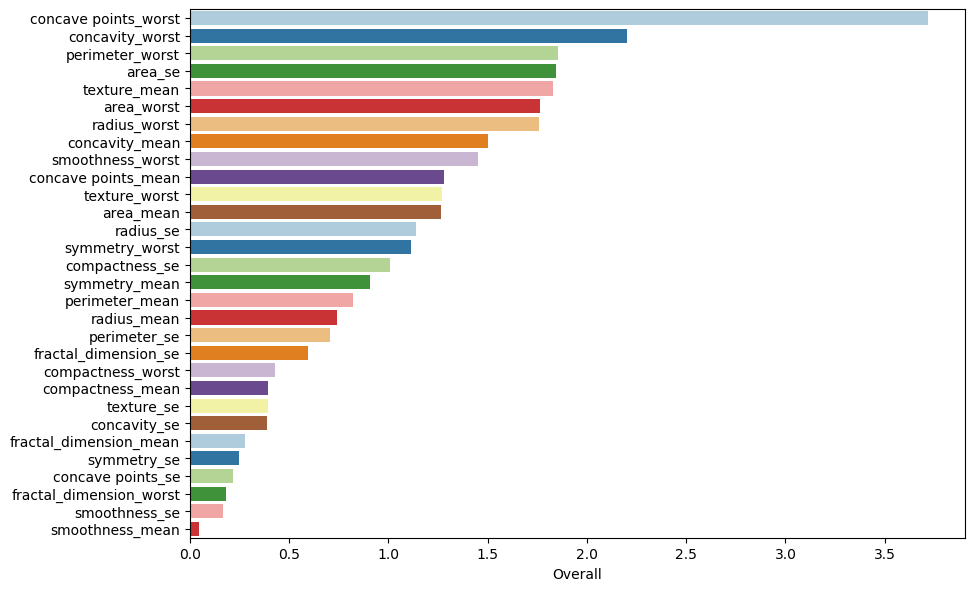

In [35]:
ordered_ranking = scaled_fi.sort_values('Overall', ascending=False)
fig, ax = plt.subplots(figsize=(10,7), dpi=100)
sns.barplot(data=ordered_ranking, y=ordered_ranking.index, x='Overall', palette='Paired')

**Insights**:
- Worst Perimeter is the most important features between models;
- There is a clear preference for Worst features on models. The top 3 features are 'Worst';
- From bottom se features are majority.   

This is what our models have to tell us. If we decided on dropping features based on the correlations plotted we would've gotten some of them wrong. 

Let's try now removing the Bottom 5 and repeat the training to see if we get any better results. 

In [36]:
train_v2 = train_data.drop(ordered_ranking.index[:-6:-1], axis=1)
test_v2 = test_data.drop(ordered_ranking.index[:-6:-1], axis=1)

X_train_v2 = train_v2.drop('diagnosis' ,axis=1)
X_test_v2 = test_v2.drop('diagnosis' ,axis=1)


In [37]:
scores_v2,pred_v2 =initial_model(X_train_v2,y_train)

In [38]:
measure_cols = ['Accuracy', 'Recall']

fs_scores = pd.DataFrame(columns=measure_cols)

for name, score in zip(model_names, scores_v2):
    
    new_row = pd.Series(data=score, name=name)
    fs_scores = fs_scores.append(new_row)
    
fs_scores = fs_scores.sort_values('Recall', ascending=False)

d={'First Scores':first_score, 'Less Features':fs_scores}
pd.concat(d, axis=1, sort=False)

First Scores           Less Features          
                        Accuracy    Recall      Accuracy    Recall
Logistic Regression     0.984968  0.966437      0.987468  0.973103
SVC                     0.977468  0.953103      0.977468  0.953103
Ada Boost               0.959810  0.939770      0.957310  0.939770
Gradient Boost          0.959778  0.939310      0.949778  0.919310
Random Forest           0.954778  0.932874      0.952278  0.939540
kNN                     0.964842  0.926207      0.967373  0.919310
Decision Tree           0.932057  0.926207      0.927057  0.912644

**Insights from Feature Selection**:

- What changed?
    - Logistic Regression,RF imporved and leading for now
    - SVC, AdaBoost ,GradientBoosting didn't change at all
    - KNN, Decision Tree got worst;
    

<b>It is not clear if removing the features was a good decision or not. When in doubt, opt for the simpler choice: We are removing them.</b>

In [39]:
oof_dataframe = pd.DataFrame(data=pred_v2, columns=model_names, index=train_data.index)
oof_dataframe['diagnosis'] = train_data['diagnosis']

In [40]:
oof_dataframe.sample(10)

Logistic Regression       SVC  kNN  Decision Tree  Random Forest  \
122             1.000000  0.894319  1.0            1.0           0.95   
168             0.999998  0.999996  1.0            1.0           1.00   
18              1.000000  0.999998  1.0            1.0           1.00   
453             0.008276  0.002804  0.0            0.0           0.06   
487             0.999999  1.000000  1.0            1.0           1.00   
530             0.012163  0.003005  0.0            0.0           0.00   
514             0.561733  0.472960  0.2            1.0           0.61   
14              0.972127  0.990204  1.0            1.0           0.91   
506             0.006815  0.001855  0.0            0.0           0.04   
511             0.002088  0.003627  0.0            0.0           0.01   

     Gradient Boost  Ada Boost  diagnosis  
122        0.999664   0.762804          1  
168        0.999550   0.686688          1  
18         0.999761   0.783046          1  
453        0.000454   0.286928          0  
487        0.999807   0.856993          1  
530        0.000122   0.234993          0  
514        0.920120   0.524604          1  
14         0.997932   0.724951          1  
506        0.000172   0.313835          0  
511        0.000283   0.315555          0

Lets see if we can find examples that all models got the classification wrong. The function defined below does just that.

## Model Tuning

I decided to tune further top 2 models based on Recall **

- Logistic Regression
- SVC


Using GridSearchCV for parameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV

#function for tuning
def train_gridsearch(model, x=X_train_v2, y=y_train, name=None):
    t_model = model
    t_model.fit(x, y)
    print(30*'-')
    if name != None: print(name)
    print('\nBest Parameters:')
    for item in t_model.best_params_.items():
        print(item[0], ': ', item[1])
    print('\nScore: ', t_model.best_score_, '\n')
    print(30*'-')

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

class Logger(BaseEstimator, TransformerMixin):
    def __init__(self, apply_log = True):
        self.apply_log = apply_log
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        logX = X.copy()
        
        if self.apply_log:
            logX = np.log1p(X)
            return logX
    
        else: return X

logger = Logger()

In [43]:
## Logistic Regression Tuning

log_pams = [{'M__solver':['liblinear'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.001, 0.01, 0.1, 1, 10, ],
             'M__penalty':['l1'], 
             'L__apply_log':[True, False]},
            {'M__solver':['lbfgs'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.001, 0.01, 0.1, 1, 10, ],
             'M__penalty':['l2'], 
             'L__apply_log':[True, False]}]

log_pipe = Pipeline(steps=[('L', logger),
                           ('S', scaler),
                           ('M', log)])

log_gs = GridSearchCV(log_pipe, log_pams, scoring='recall',cv=skf, n_jobs=-1, iid=False)

train_gridsearch(log_gs)

------------------------------

Best Parameters:
L__apply_log :  False
M__C :  10
M__class_weight :  None
M__penalty :  l1
M__solver :  liblinear

Score:  0.9797701149425289 

------------------------------


C:\Users\A272609\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Our best C is at 10 so we might refine our parameters near that value. A second run on parameter tuning could look like:

In [44]:
# Logistic Regression Initial Parameters
log_pams = [{'M__solver':['liblinear'],
             'M__class_weight':[None],
             'M__C': [1,2,4, 7, 8],
             'M__penalty':['l1'], 
             'L__apply_log':[False]}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
log_pipe = Pipeline(steps=[('L', logger),
                           ('S', scaler),
                           ('M', log)])

log_gs = GridSearchCV(log_pipe, log_pams, scoring='recall',
                      cv=skf, n_jobs=-1, iid=False)

train_gridsearch(log_gs)

C:\Users\A272609\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


------------------------------

Best Parameters:
L__apply_log :  False
M__C :  7
M__class_weight :  None
M__penalty :  l1
M__solver :  liblinear

Score:  0.9797701149425289 

------------------------------


In [45]:
logreg_tuned = log_gs.best_estimator_

In [46]:
print(confusion_matrix(y_train, log_gs.predict(X_train_v2)))

[[250   0]
 [  2 146]]


Accuracy:  99.5%     
Recall: 98.65%


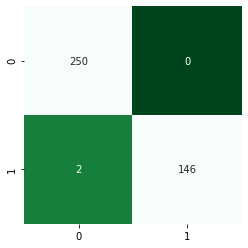

In [47]:
sns.heatmap(confusion_matrix(y_train, log_gs.predict(X_train_v2)),
                annot=True, square=True, cbar=False,
                fmt='.0f', cmap='BuGn_r', vmax=10)

print(f'Accuracy:  {100*accuracy_score(y_train, log_gs.predict(X_train_v2)):.4}% \
    \nRecall: {100*recall_score(y_train, log_gs.predict(X_train_v2)):.4}%')

Accuracy:  94.15%     
Recall: 92.19%


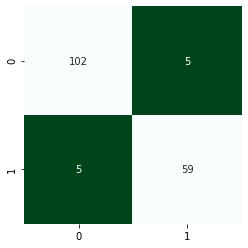

In [48]:
#logistics regression on test data

#test_v2.head()
y_test = test_v2['diagnosis']

#X_test_scaled = std_sca.transform(X_test_v2)

sns.heatmap(confusion_matrix(y_test, log_gs.predict(X_test_v2)),fmt='.0f',annot=True, square=True, cbar=False,cmap='BuGn_r', vmax=10)

print(f'Accuracy:  {100*accuracy_score(y_test, log_gs.predict(X_test_v2)):.4}% \
    \nRecall: {100*recall_score(y_test, log_gs.predict(X_test_v2)):.4}%')


## SVC Tuning

In [49]:
# SVC Initial Parameters
svc_pams = [{'M__kernel':['rbf'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
             'M__gamma':['auto', 'scale', 0.001, 0.01, 0.1],
             'L__apply_log':[True, False]}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
svc_pipe = Pipeline(steps=[('L', logger),
                           ('S', scaler),
                           ('M', svc)])

svc_gs = GridSearchCV(svc_pipe, svc_pams, scoring='recall',
                      cv=skf, n_jobs=-1, iid=False, refit=True)

train_gridsearch(svc_gs)

------------------------------

Best Parameters:
L__apply_log :  True
M__C :  100
M__class_weight :  None
M__gamma :  0.01
M__kernel :  rbf

Score:  0.9797701149425289 

------------------------------


C:\Users\A272609\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [50]:
#SVC Second round Parameters
svc_pams = [{'M__kernel':['rbf'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.05, 0.07, 0.1, 0.12, 0.15, 0.2,80,90,100,110],
             'M__gamma':[0.01],
             'L__apply_log':[True]}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
svc_pipe = Pipeline(steps=[('L', logger),
                           ('S', scaler),
                           ('M', svc)])

svc_gs = GridSearchCV(svc_pipe, svc_pams, scoring='recall',
                      cv=skf, n_jobs=-1, iid=False)

train_gridsearch(svc_gs)

------------------------------

Best Parameters:
L__apply_log :  True
M__C :  80
M__class_weight :  None
M__gamma :  0.01
M__kernel :  rbf

Score:  0.9797701149425289 

------------------------------


C:\Users\A272609\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Accuracy:  99.5%     
Recall: 98.65%


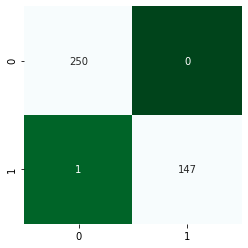

In [51]:
sns.heatmap(confusion_matrix(y_train, svc_gs.predict(X_train_v2)),
                annot=True, square=True, cbar=False,
                fmt='.0f', cmap='BuGn_r', vmax=10)

print(f'Accuracy:  {100*accuracy_score(y_train, log_gs.predict(X_train_v2)):.4}% \
    \nRecall: {100*recall_score(y_train, log_gs.predict(X_train_v2)):.4}%')

Accuracy:  95.91%     
Recall: 93.75%


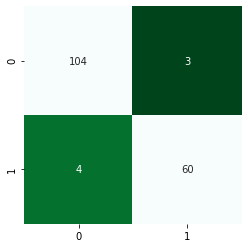

In [52]:
#test_data 
sns.heatmap(confusion_matrix(y_test, svc_gs.predict(X_test_v2)),
                annot=True, square=True, cbar=False,
                fmt='.0f', cmap='BuGn_r', vmax=10)

print(f'Accuracy:  {100*accuracy_score(y_test, svc_gs.predict(X_test_v2)):.4}% \
    \nRecall: {100*recall_score(y_test, svc_gs.predict(X_test_v2)):.4}%')



## Summary - Insights from the results 

* Logistic Regression on training data
    - Accuracy:  99.5%     
    - Recall: 98.65%

* Logistic Regression on testing data
    - Accuracy:  94.15%     
    - Recall: 92.19%

* SVC on training data
    - Accuracy:  99.5%     
    - Recall: 98.65%

* SVC on testing data
    - Accuracy:  95.91%     
    - Recall: 93.75%

* Both models got at least 92% recall - for this data this means 5 malignant tumors not detected
* Best model SVC performed the best, with **93.75%** malgiinant tumors detected.